#### Importing Necessary Libraries

In [121]:
#import neccessary packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Data Loading and Understanding

In [122]:
# Data loading
bike_sharing = pd.read_csv('day.csv')

##### Inspecting data ( Rows,Columns,datatypes,null values,dimensions)

In [123]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [124]:
bike_sharing.shape

(730, 16)

In [125]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [126]:
bike_sharing.ndim

2

In [127]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Missing value check 

In [128]:
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no null values/missing values in dataset

#### Duplicate check and drop

In [129]:
bike_sharing.shape

(730, 16)

In [130]:
bike_sharing.drop_duplicates(inplace=True) # dropping duplicate rows if any

In [131]:
bike_sharing.shape

(730, 16)

#### There are no duplicates in dataset as we see no of rows and columns are same before and after performing operation

#### Outlier Check

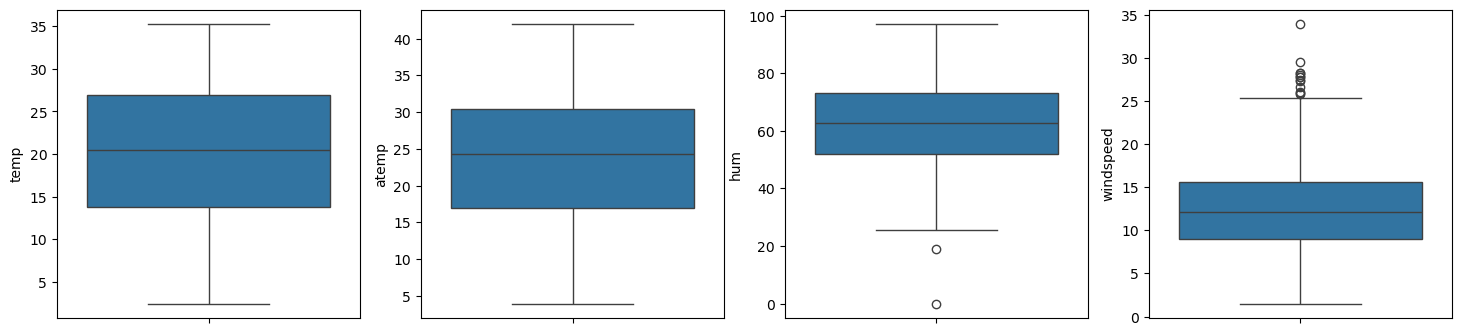

In [132]:
# Box plots for independent variables with continuous values to check for outliers
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_sharing)
    i+=1

#### Observing the above plots we see there are no outliers.

#### Dropping columns 'instant','dteday','casual','registered' as they don't add any value towards target
    -  a. instant : It has nothing to do with analysis
    -  b. dteday  : Data is already present in the form of year,month
    -  c. casual, registered : cnt which is target is already a sum of these both

In [133]:
bike_sharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [134]:
bike_sharing.shape

(730, 12)

#### Now we have 12 columns and 730 rows in our dataset 

### Exploratory data analysis

In [135]:
# creating a list of categorical and numerical variables for Visualization
num_cols=['cnt', 'temp', 'atemp', 'hum','windspeed']
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']

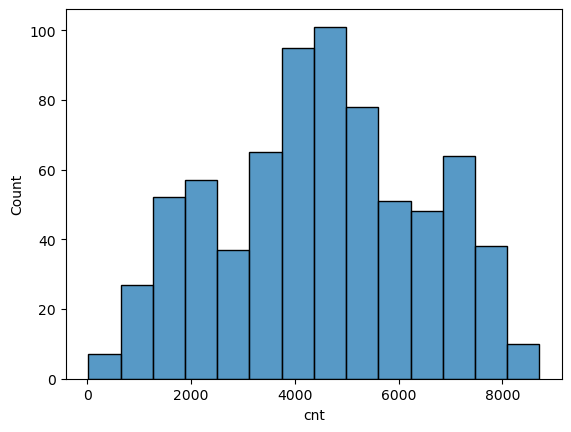

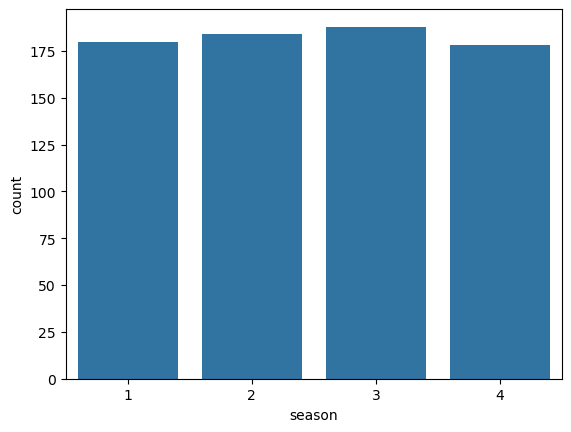

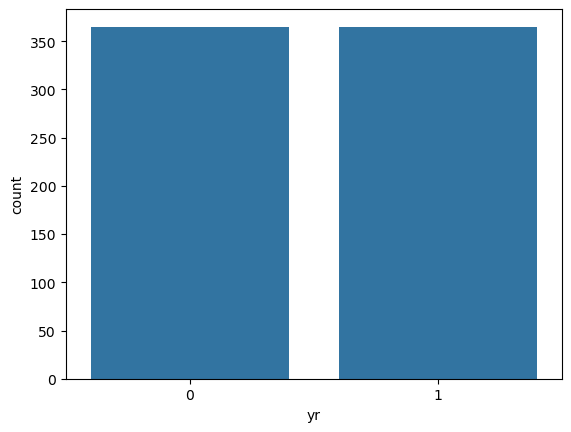

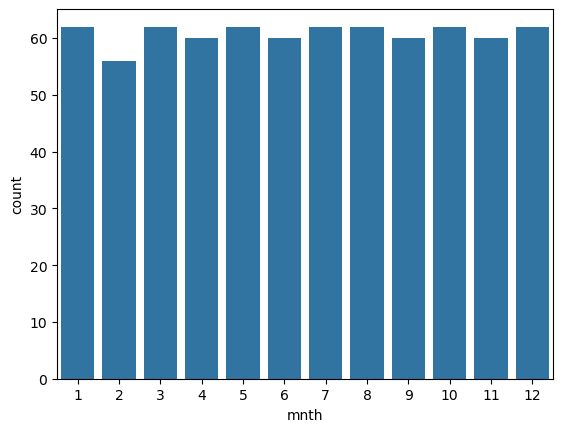

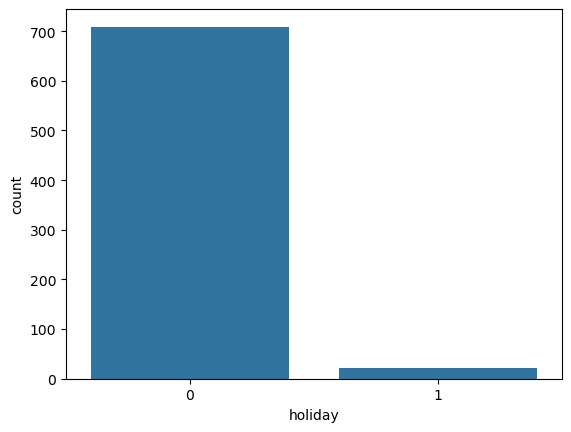

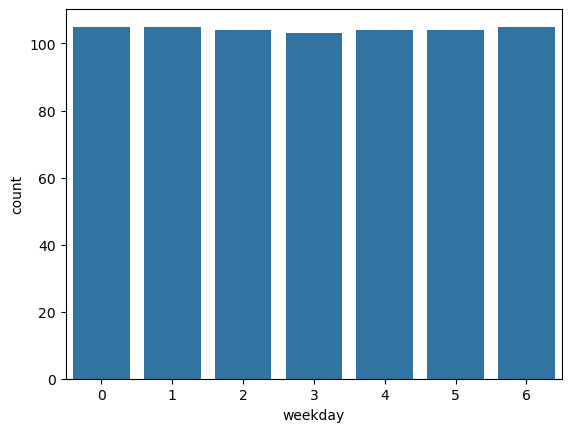

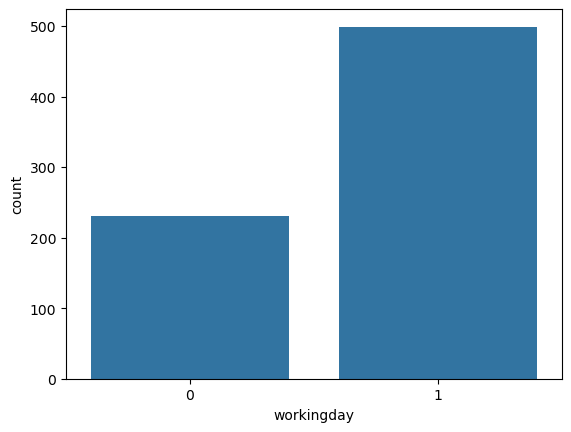

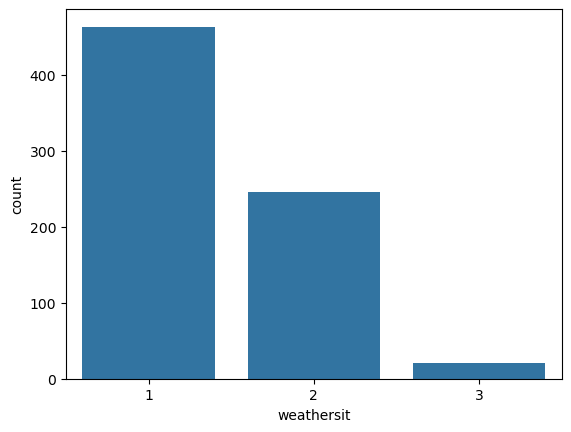

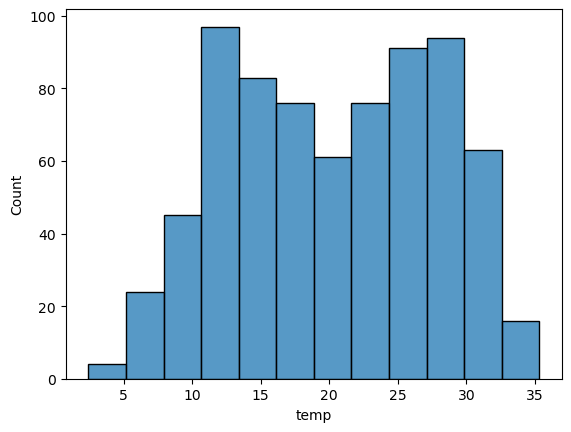

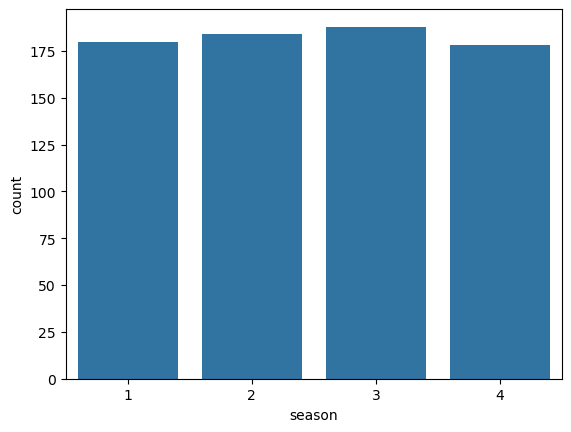

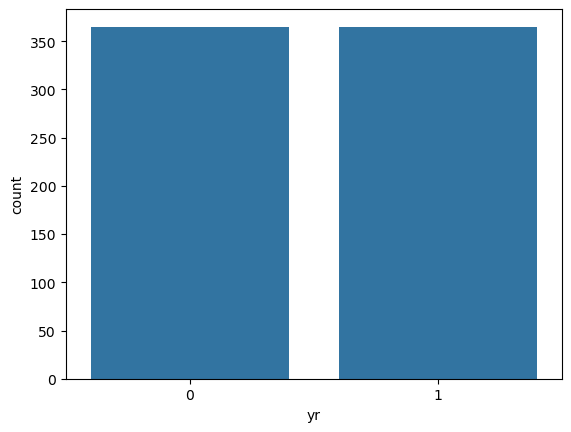

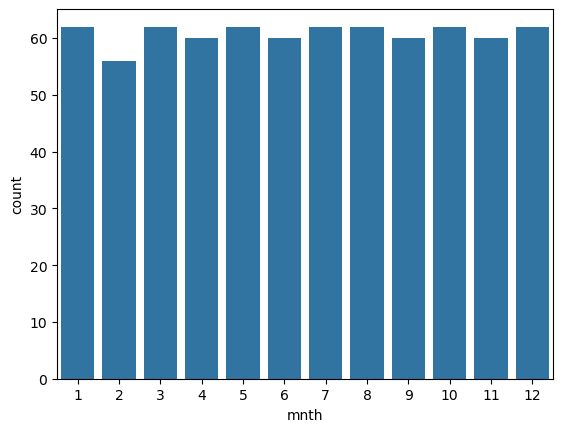

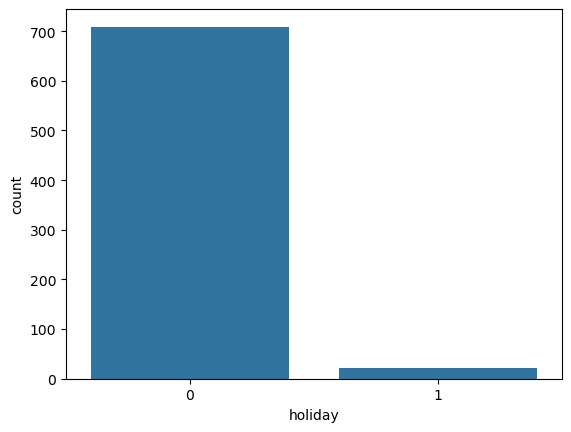

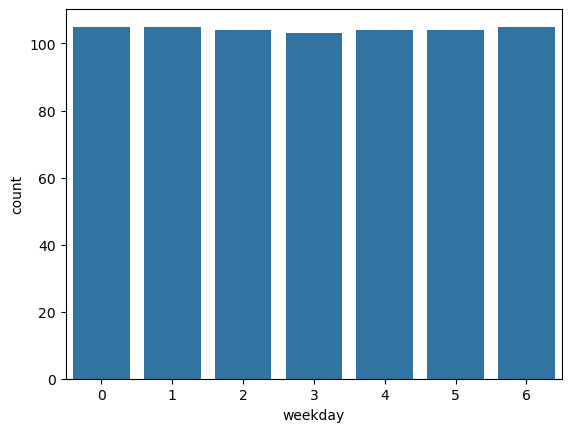

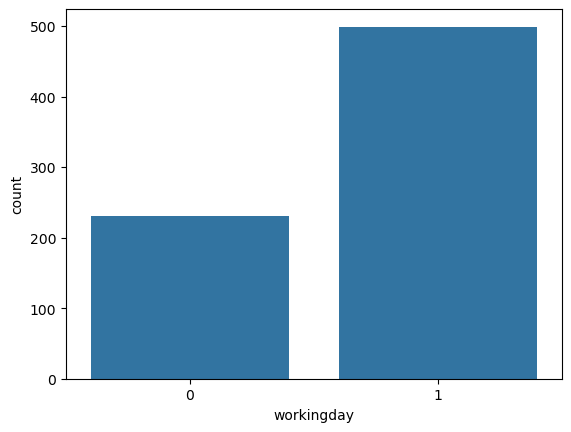

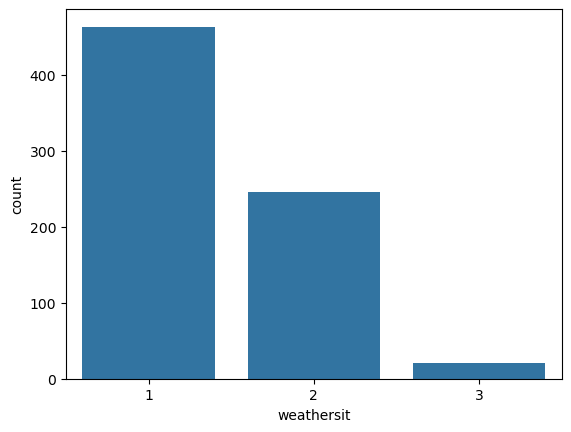

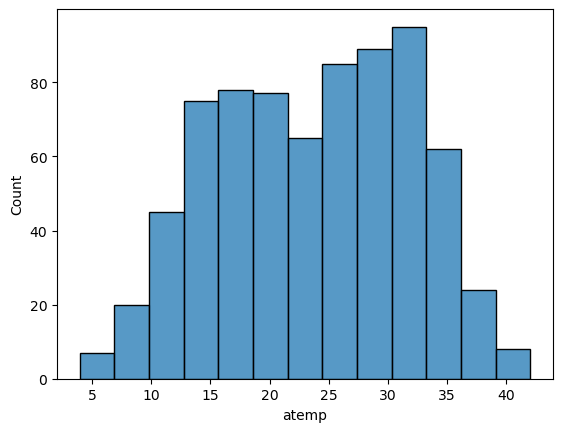

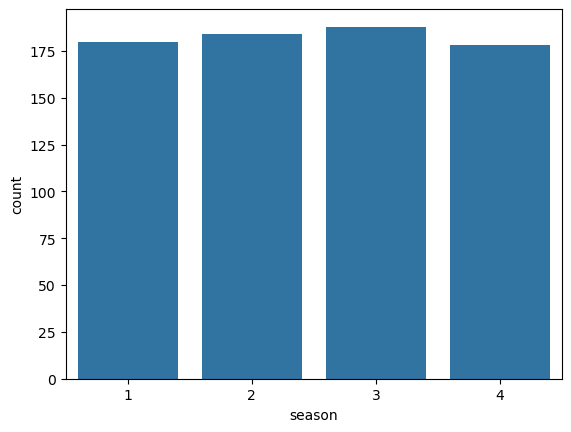

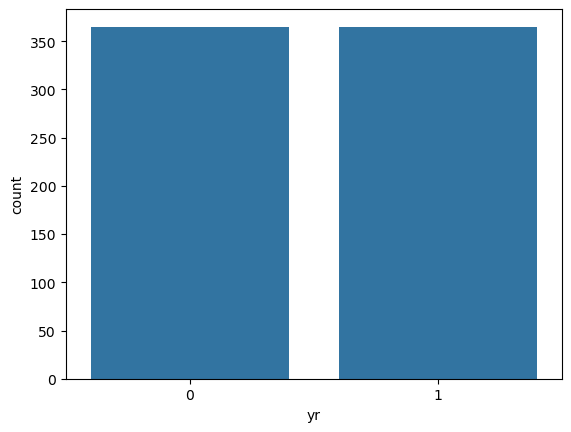

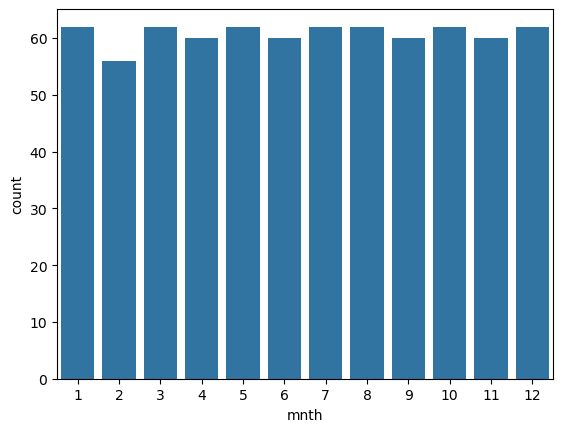

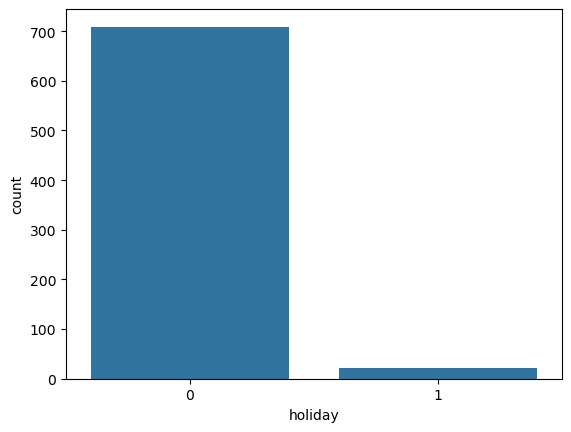

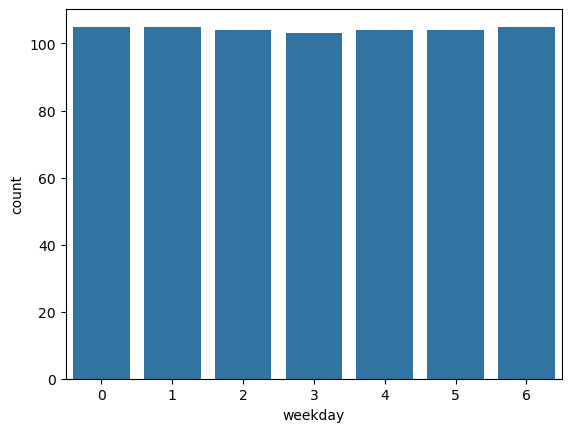

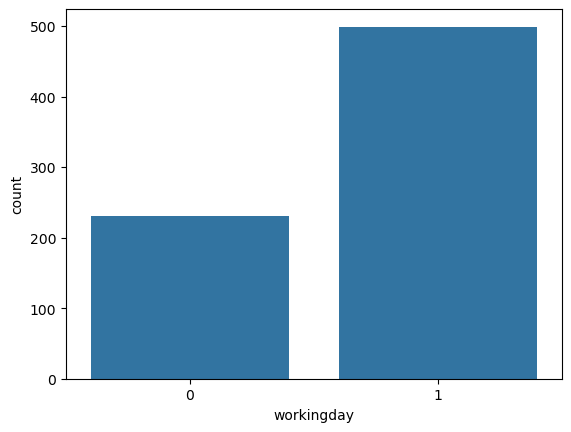

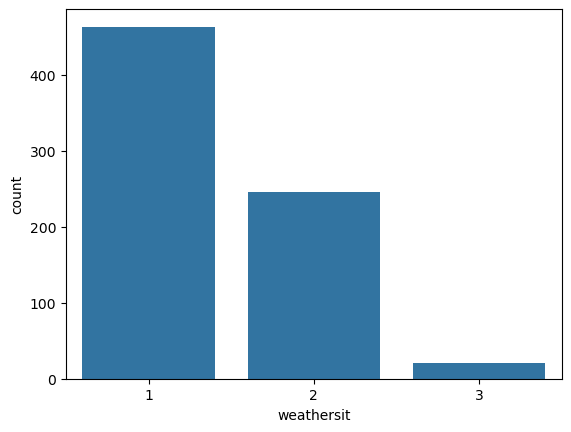

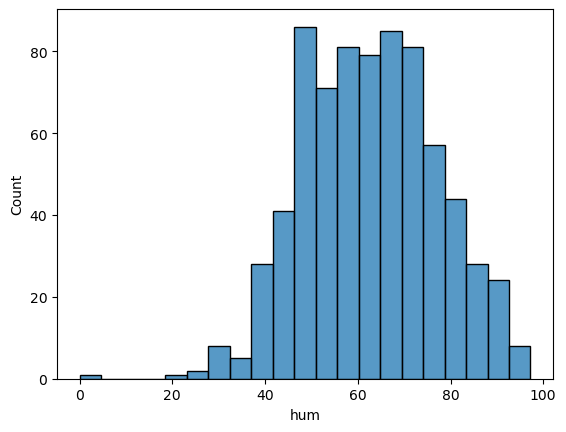

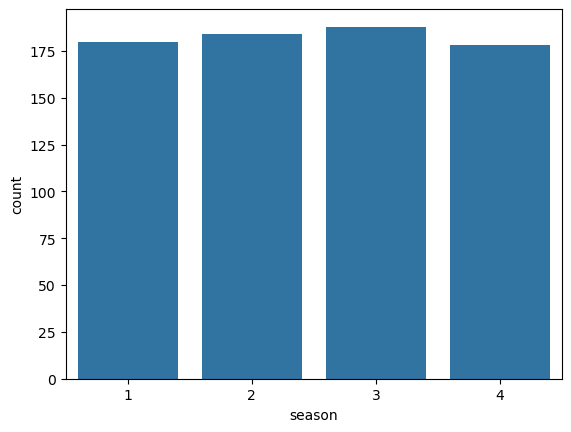

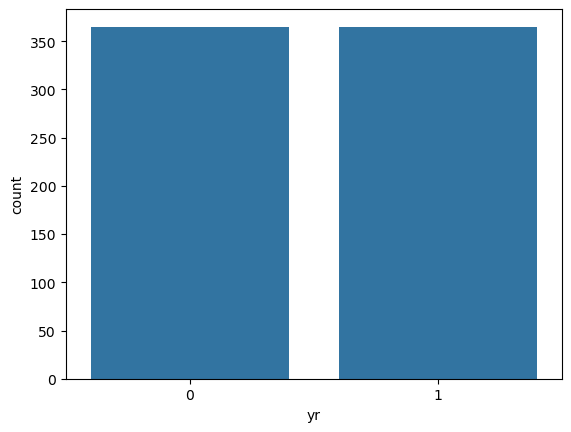

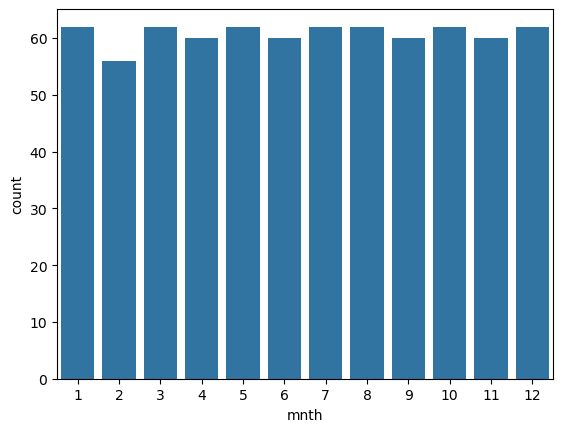

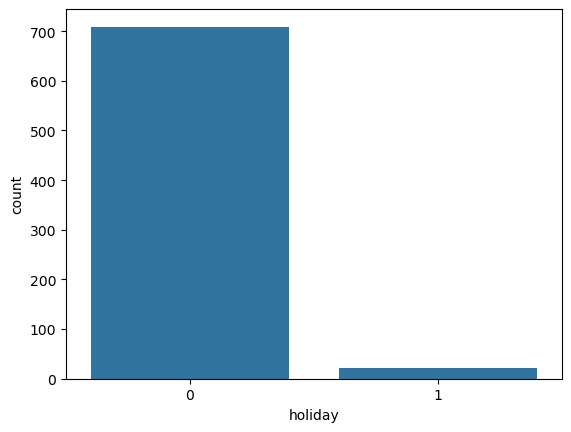

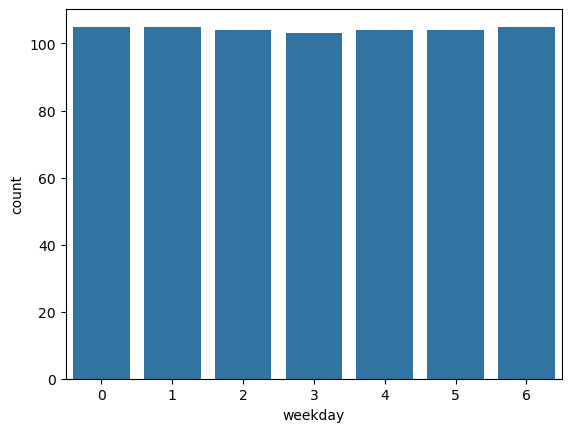

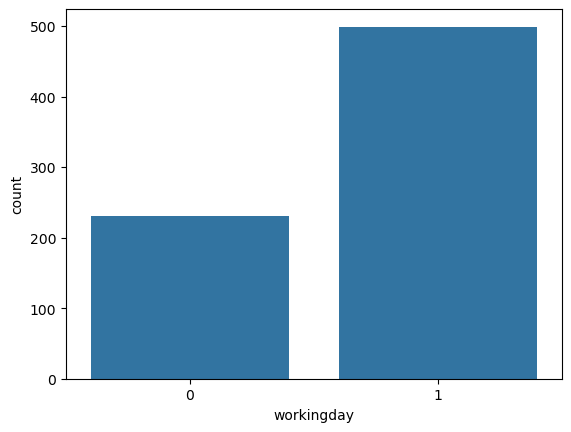

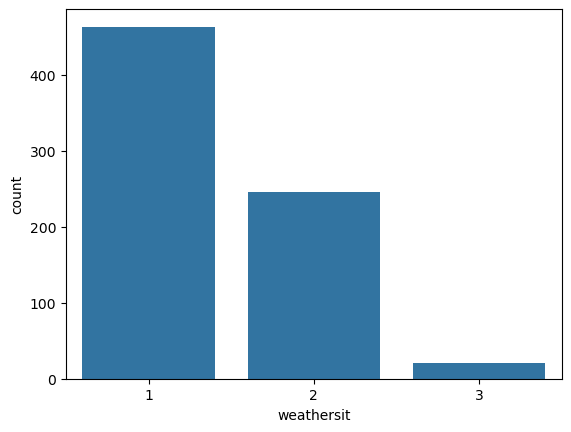

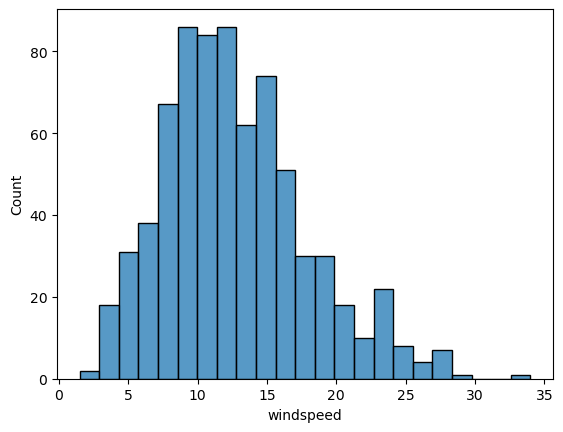

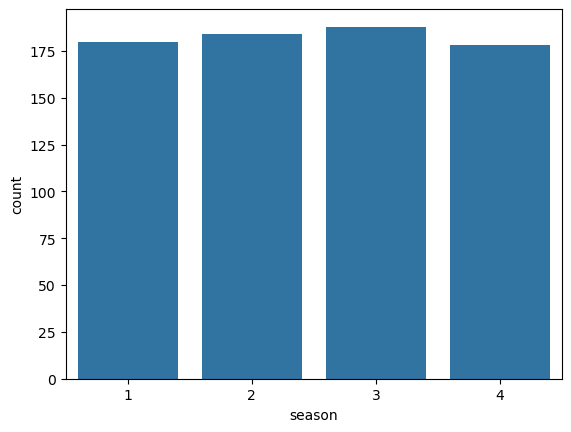

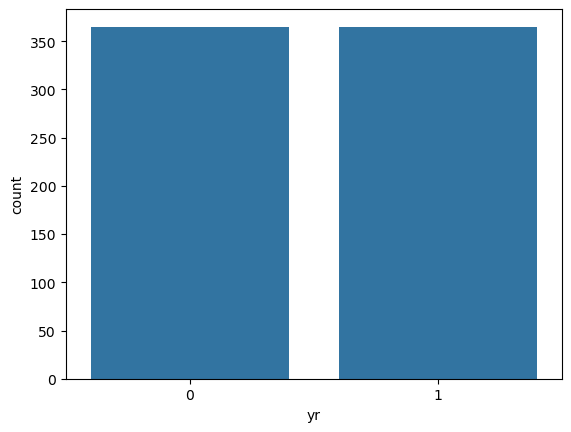

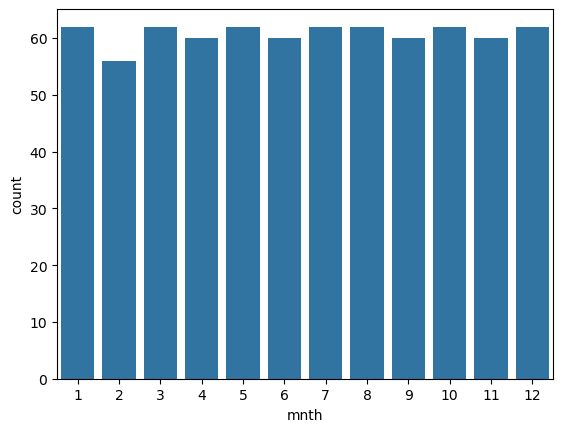

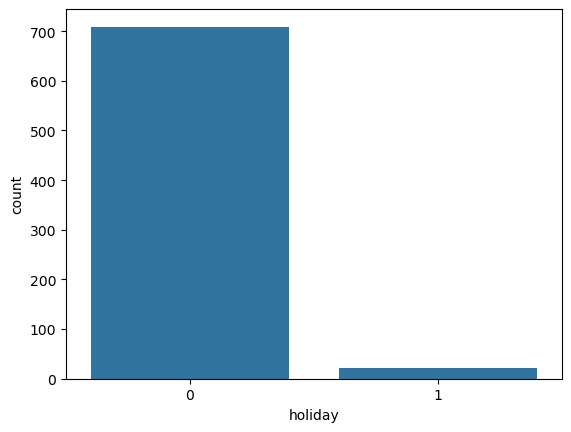

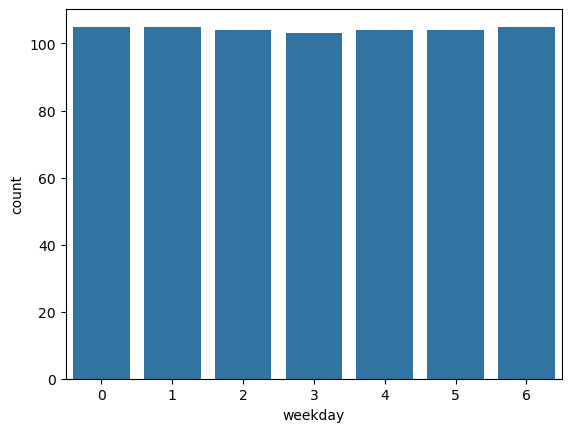

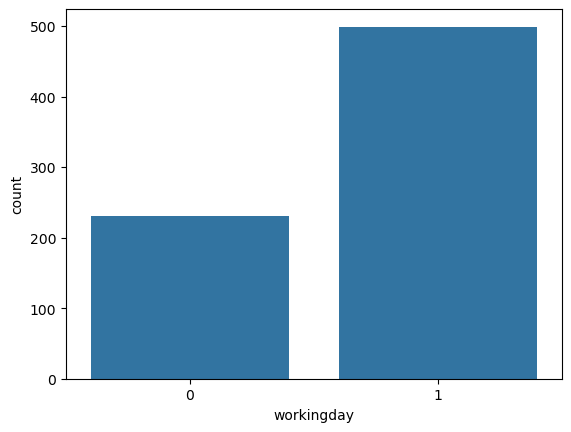

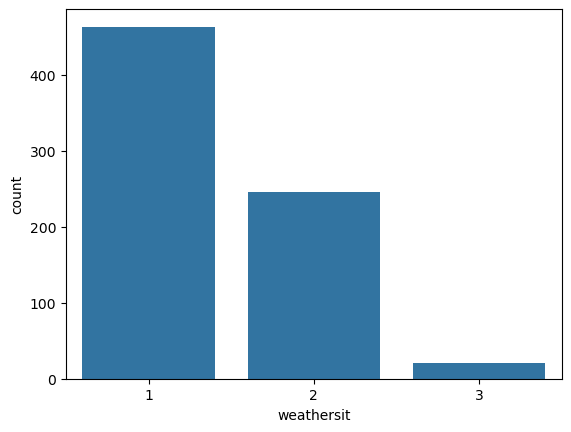

In [136]:
# Univariate Analysis

for i in num_cols:
    sns.histplot(x=bike_sharing[i])
    plt.show()
    for i in cat_cols:
        sns.countplot(x=bike_sharing[i])
        plt.show()

#### Inference
- Most bikes are booked during workingday unlike holidays
- Clear weather shows a trend of more possible bookings
- temp ( between 60-80 degree celsius ) correspond to demand in bike sharing.

<Figure size 1500x3000 with 0 Axes>

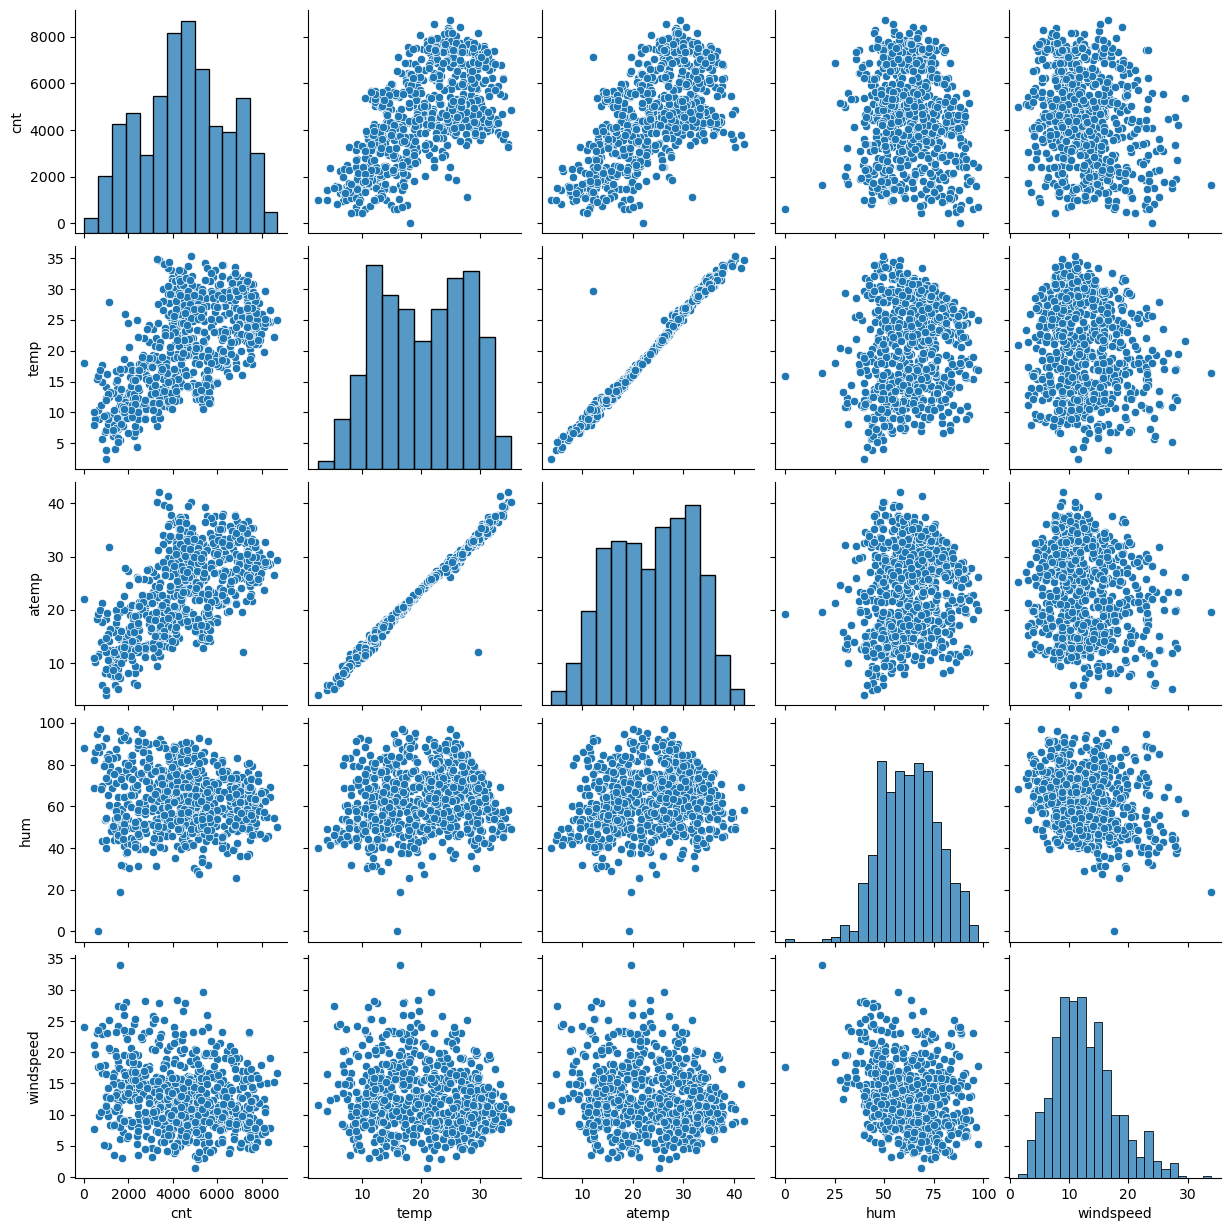

In [137]:
# Bivariate analysis
# Pairplot for continuous variables w.r.t target variable cnt
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_sharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Inference
- From the visualizations above temp, atemp has the linearity w.r.t target
- Both variables have highest corelation w.r.t cnt

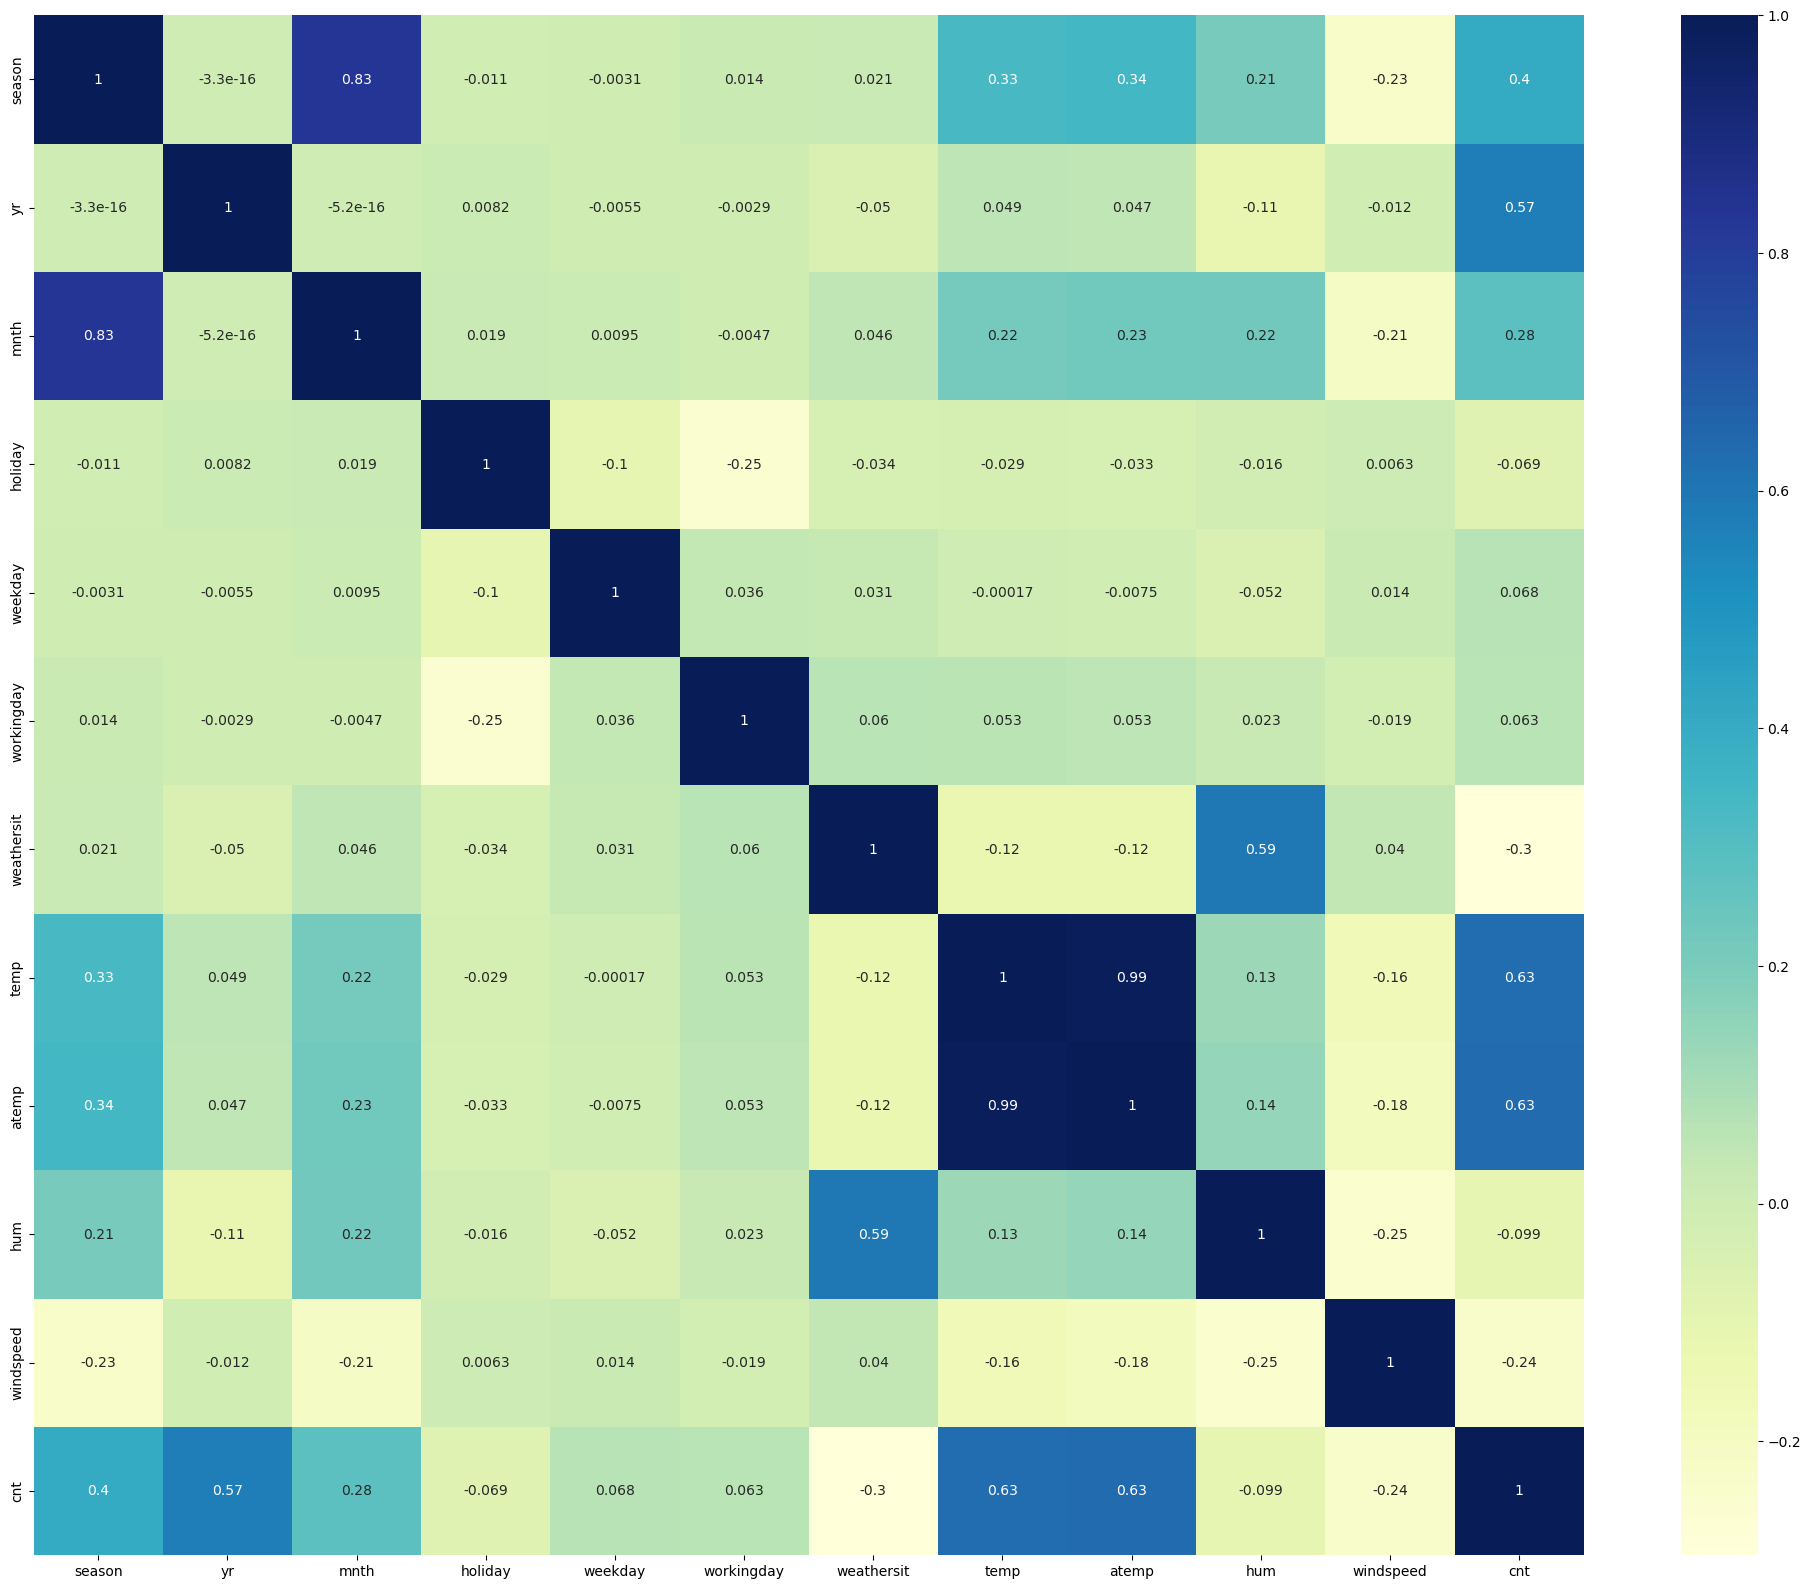

In [138]:
# Multivariate analysis
#heatmap to check correlation between variables

plt.figure(figsize=(25,20))
sns.heatmap(bike_sharing.corr(),annot=True,cmap="YlGnBu")
plt.show()

#### Inference
- temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp.
- Next highest correlation is mnth variable which is .83 with 'cnt'

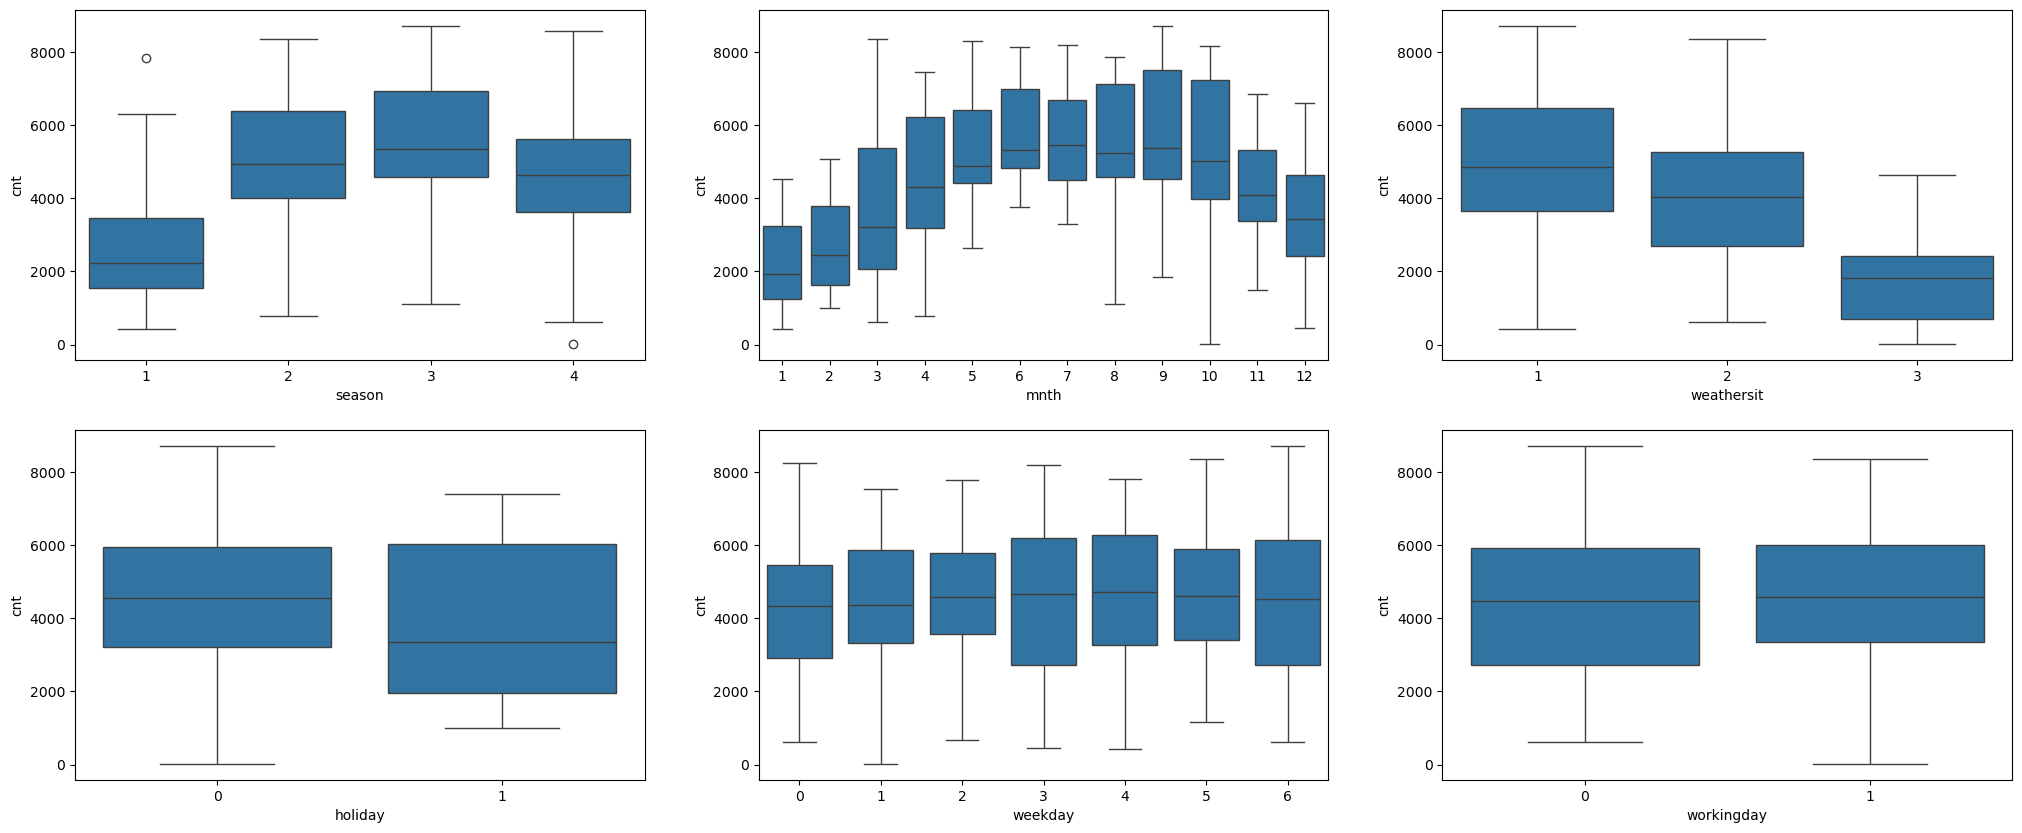

In [139]:
# Build boxplot of all categorical variables to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.show()


- workingday-median is 5000 booking per day which is a good predictor for target variableriableriable

#### Observations: (How independent variables are affecting dependent variable 'cnt')
- No.of bookings with change in season shows a insight : fall:5000 bookings in 2018 ,2019 summer,winter: median is 2000 bookings
- mnth variable has a trend of how much bookings happened in particular months.Aug,sep,oct have good bookings.
- weathersit-clear: has 60% booking rate ,misty: has 30%.
- holiday-not a good predictor variable, <3% bookings happened during holiday
- weekday-median of 13.5% bookings happened on a weekday.
- workingday-median is 5000 booking per day which is a good predictor for target variable

### Data Preparation for modelling

We have categorical variables which have more than 2 values to it.

In [140]:
bike_sharing[['season','yr','mnth','holiday','weekday','workingday','weathersit']].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [141]:
# Mapping values for meaningfull column name for categorical variables to create dummies
bike_sharing.season = bike_sharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_sharing.mnth = bike_sharing.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_sharing.weekday = bike_sharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_sharing.weathersit = bike_sharing.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

### Creating dummies for categorical variables

In [142]:
# Creating Dummy variables
# Drop first dummy variable for each set of dummies created using drop_first

months_new=pd.get_dummies(bike_sharing.mnth,drop_first=True,dtype=int)
weekdays_new=pd.get_dummies(bike_sharing.weekday,drop_first=True,dtype=int)
weathersit_new=pd.get_dummies(bike_sharing.weathersit,drop_first=True,dtype=int)
seasons_new=pd.get_dummies(bike_sharing.season,drop_first=True,dtype=int)

In [143]:
# concatenating the dummy with original one

bike_sharing = pd.concat([bike_sharing,months_new,weekdays_new,weathersit_new,seasons_new],axis=1)

In [144]:
#Drop original variable for which the dummy was created
bike_sharing.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [145]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


### Splitting into train and test

In [146]:
df_train,df_test=train_test_split(bike_sharing,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the features
- We do rescaling because all coefficients of continuous variables shoould be at comparable scale

In [147]:
# Instantiate an object
scaler=MinMaxScaler()

# Fit on data
df_train[num_cols]=scaler.fit_transform(df_train[num_cols])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [148]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### MODEL BUILDING

#### Dividing into X and Y sets for the model building

In [149]:
y_train=df_train.pop('cnt')
X_train=df_train

### Feature Selection (Automated approach)
#### RFE (Recurssive Feature Elimination ) 

In [150]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(estimator=LinearRegression(), n_features_to_select=15)  # running RFE
rfe=rfe.fit(X_train,y_train)

In [151]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [152]:
# features selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [153]:
# Features not selected
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

### Manual Approach
#### Building model using statsmodel

In [154]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train, X_train_sm).fit()
    print(lr.summary())
    return lr

In [155]:
#Function to calculate VIF
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### MODEL 1

In [156]:
#Creating X_test dataframe with RFE selected variables
cols=['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.22e-191
Time:                        21:05:38   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

### MODEL 2

In [157]:
# Dropping the variable 'hum' as it has high VIF value compared to other variables.

cols=['yr', 'holiday', 'workingday', 'temp', 'windspeed','jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.60e-188
Time:                        21:05:38   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

### MODEL 3

In [158]:
# Dropping holiday variable as it has high p-value compared to others

cols=['yr', 'workingday', 'temp', 'windspeed','jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.68e-189
Time:                        21:05:38   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

### MODEL 4

In [159]:
# Dropping temp variable as it has high VIF value

cols=['yr', 'workingday', 'windspeed','jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.41e-154
Time:                        21:05:39   Log-Likelihood:                 424.05
No. Observations:                 510   AIC:                            -822.1
Df Residuals:                     497   BIC:                            -767.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5364      0.020     27.

### MODEL 5

In [160]:
# Dropping july as it has high P-value

cols=['yr', 'workingday', 'windspeed','jan', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.01e-155
Time:                        21:05:39   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5332      0.018     30.

### MODEL 6

In [161]:
# Dropping windspeed as it has high VIF compared to other variables

cols=['yr', 'workingday','jan', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.65e-148
Time:                        21:05:39   Log-Likelihood:                 403.50
No. Observations:                 510   AIC:                            -785.0
Df Residuals:                     499   BIC:                            -738.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4819      0.017     29.

### NO MULTICOLLINEARITY
From the VIF calculation we could find that there is no multicollinearity between the predictor variables, as all the values are within   permissible range of below 5

### HYPOTHESIS TESTING
From the above model summary, it is evident that all our coefficients are not equal to zero which means WE REJECT THE NULL HYPOTHESIS

  ### Other Inferences
- In the Model 6 VIF seems to be in acceptable range for all 9 variables.
- P-value is 0 for all variables
- Statistics(R-square,Adjusted R-square,F-static ) is high
- Difference between R-square,Adjusted R-square is very less

### Linear Regression Model (Line of best fit)

cnt = 0.4819 + (yr × 0.2470) + (workingday × 0.0577) - (jan × 0.0889) + 
(sep × 0.0765) + ( sat × 0.0619) - ( Light_snowrain ×0.3209) - (Misty × 0.0860) - 
(spring ×0.2828) − (summer × 0.0551) − (winter × 0.0780)

In [162]:
#function with all columns from Model 6 to select features automatically

def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

#### Final model

In [163]:
cols=['yr', 'workingday', 'windspeed', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']

lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.5299370610928913 [ 0.24748328  0.05629226 -0.17209607  0.07231014  0.06379881 -0.3001181
 -0.09067966 -0.29694545 -0.04033805 -0.07443003]


## Model Evaluation
### Residual Analysis

In [164]:
y_train_pred = lr.predict(X_train[cols])

In [165]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

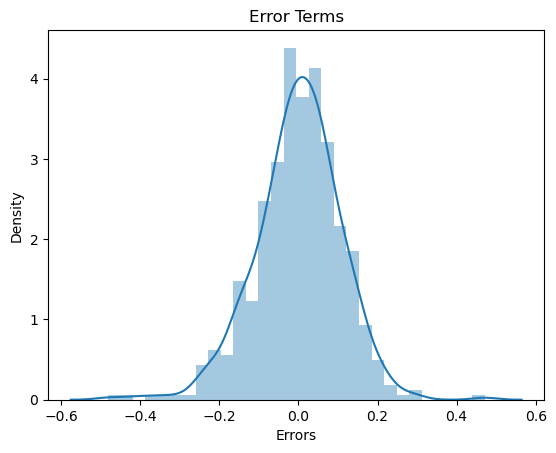

In [166]:
plot_res_dist(y_train, y_train_pred)

### Normality Check
#### Errors are normally distributed with mean 0 from the above plot

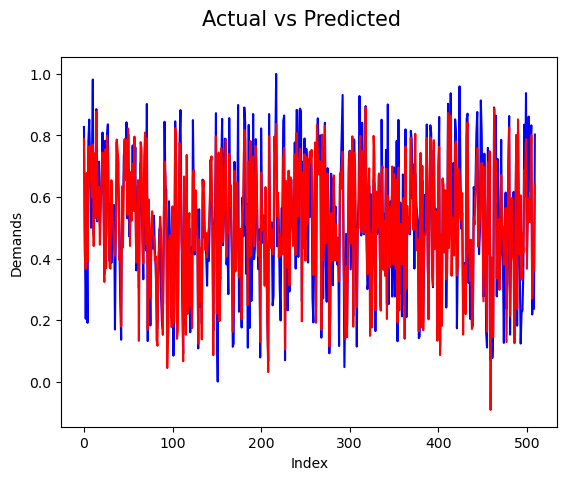

In [167]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems good from the above plot

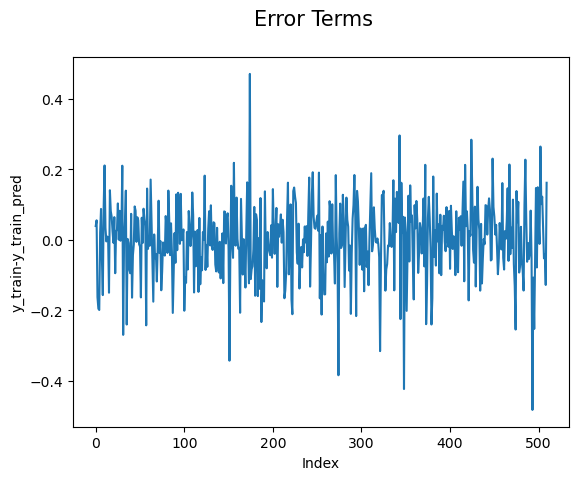

In [168]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### No Endogeneity
#### Error terms are independent of each other from above plot

#### R-squared Value

In [169]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7673945103443616

#### R-Square is same as we obtained for our final model

### Linearity Check

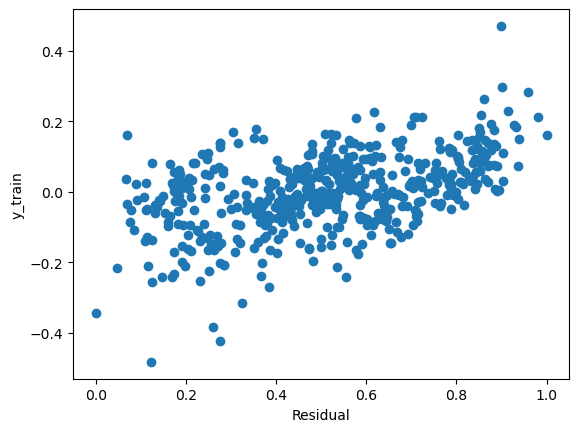

In [170]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## Predict Values for test data set

In [171]:
#Scale variables in X_test
num_vars = ['cnt', 'temp', 'atemp', 'hum','windspeed']

#Test data to be transformed only, no fitting
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [172]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
y_test=df_test.pop('cnt')
X_test=df_test


In [174]:
# Add a constant
X_test=sm.add_constant(X_test)
X_test.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,...,0,0,0,0,1,0,0,0,1,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,0,0,1,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,...,0,0,1,0,0,0,0,0,1,0


In [175]:
#Columns from our final model
cols=['yr', 'workingday', 'windspeed', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
# Predicting values for test data
y_test_pred = lr.predict(X_test[cols])

#### R-squared value for test predictions

In [176]:
r2_score(y_train,y_train_pred)

0.7673945103443616

#### The value of R-square is same for train data(0.767) and test data(0.767),So Model is accurate even on unseen data with good R=squared value

### Homoscedacity

Text(0, 0.5, 'y_test_pred')

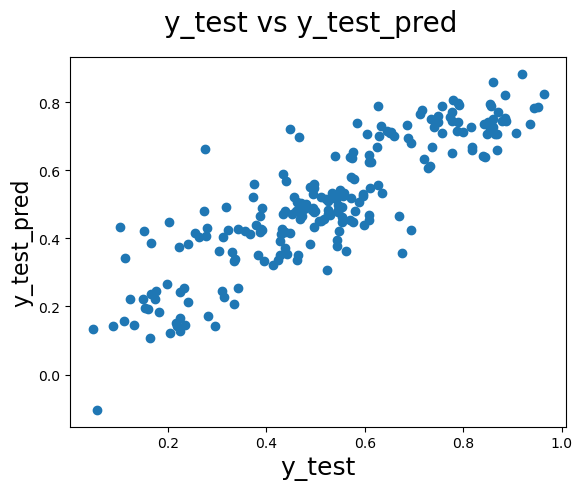

In [177]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### Inference
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### Plot Test vs Predicted test values

In [178]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16) 

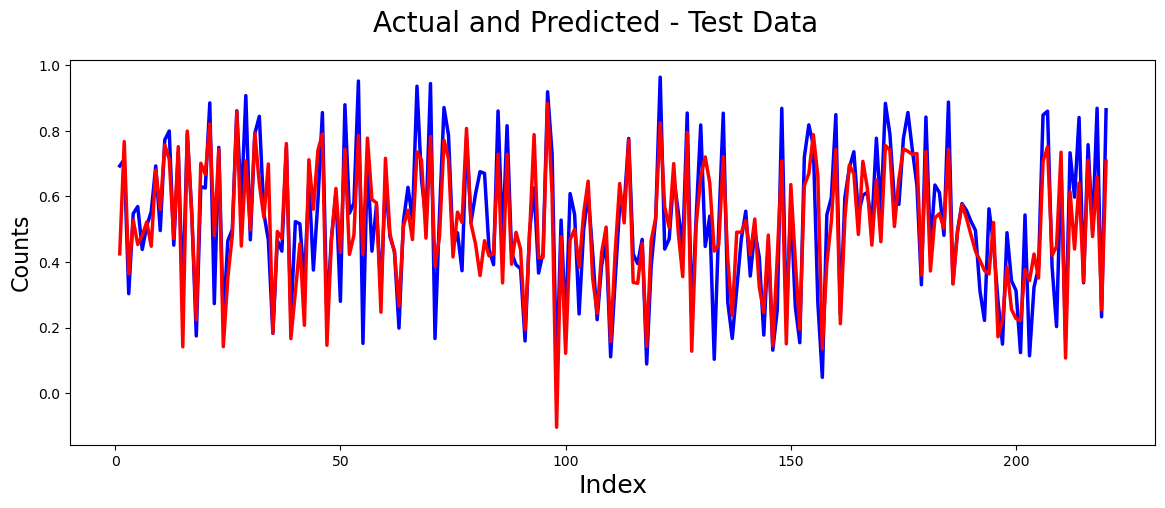

In [179]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### Inference
Prediction seems to be close to actuals

### MODEL INTERPRETATION

In [180]:
cols=['yr', 'workingday','jan', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.65e-148
Time:                        21:05:42   Log-Likelihood:                 403.50
No. Observations:                 510   AIC:                            -785.0
Df Residuals:                     499   BIC:                            -738.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4819      0.017     29.

### Making Predictions
-  Company should focus on expanding business during Spring.
-  Company should focus on expanding business during working days.
-  Based on previous data it is expected to have a boom once situation is back to normal, compared to 2019.
-  There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.
-  The company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

### Conclusion
#### Significant variables to predict the demand for shared bikes

-  workingday
-  spring
-  yr
-  summer
-  winter
-  jan
-  Misty
-  sat
-  sep
-  Light_snowrain